## 2. Любой метод одномерного поиска и градиентный спуск на его основе

### Методы одномерного поиска:

1. Метод Дихотомии
2. Метод золотого сечения



#### Импорты:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from one_dimention_search import *

## Пример работы одномерного поиска на параболической функции:

=== Dichotomy Method ===


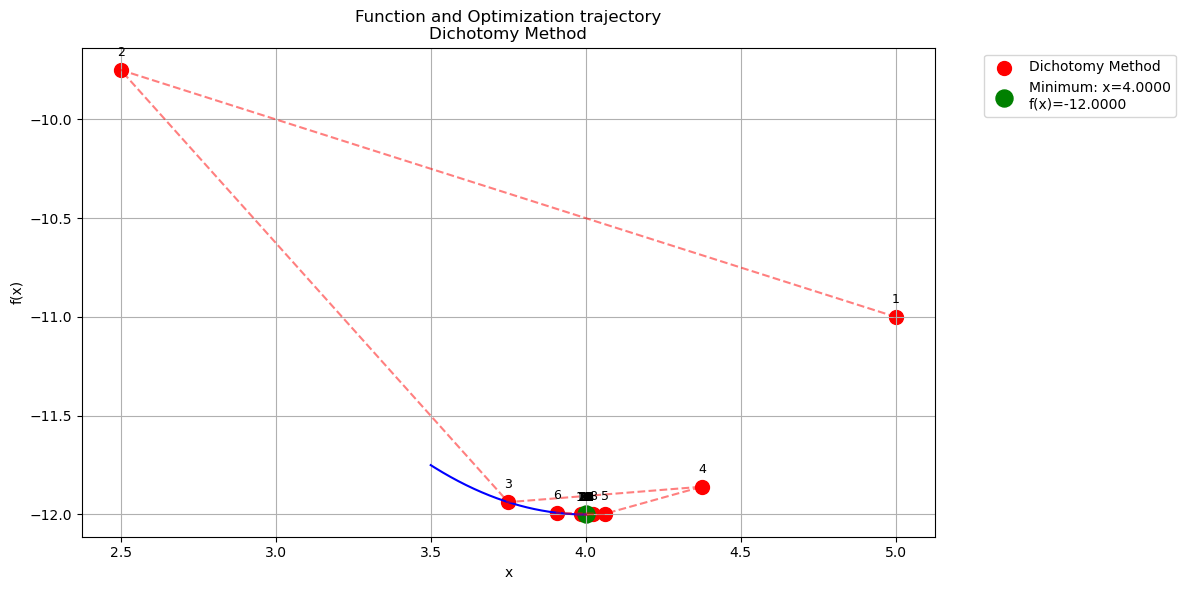


=== Golden Section Method ===


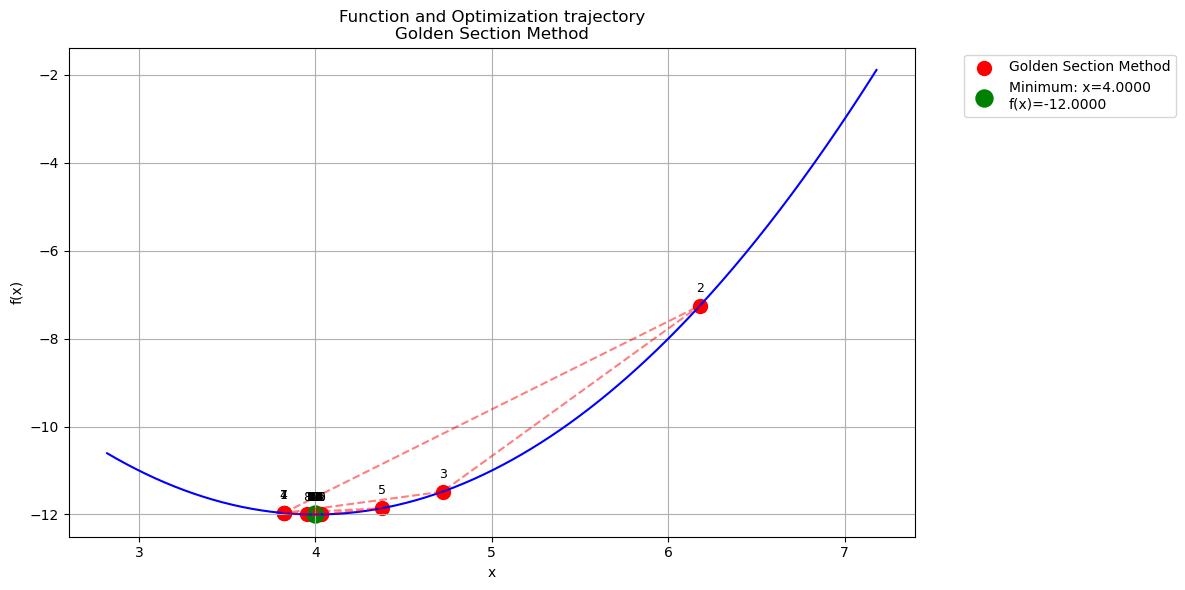


=== Results Comparison ===
Dichotomy:  x = 4.000013, f(x) = -12.000000
Golden Sec: x = 4.000000, f(x) = -12.000000


In [2]:
if __name__ == "__main__":

    def test_function(x):
        return (x - 2) ** 2 - 4 * x


    epsilon = 1e-10
    a, b = -10, 10  # Интервал поиска

    print("=== Dichotomy Method ===")
    dm = DichotomyMethod(epsilon, test_function)
    result_dm = dm.calc(a, b)
    dm.plot_trajectory(dm.trajectory)

    print("\n=== Golden Section Method ===")
    gsm = GoldenSectionMethod(epsilon, test_function)
    result_gsm = gsm.calc(a, b)
    gsm.plot_trajectory(gsm.trajectory)

    # Сравнение результатов
    print("\n=== Results Comparison ===")
    print(f"Dichotomy:  x = {result_dm:.6f}, f(x) = {test_function(result_dm):.6f}")
    print(f"Golden Sec: x = {result_gsm:.6f}, f(x) = {test_function(result_gsm):.6f}")

Данная функция является выпуклой, гладкой, имеет глобальный минимум в точке `[2, -4]`, что делает её отличным примером для тестирования методов оптимизации.

---

## ⚙️ Используемые методы

Реализованы и протестированы следующие стратегии градиентного спуска и одномерной оптимизации:

| Метод               | Стратегия выбора шага                         | Гиперпараметры                                 |
|---------------------|-----------------------------------------------|------------------------------------------------|
| **Dichotomy Method** | Поиск минимума с делением интервала пополам    | `epsilon=1e-10`, `a=-10`, `b=10`               |
| **Golden Section Method** | Использует золотое сечение для нахождения минимума | `epsilon=1e-10`, `a=-10`, `b=10`               |

---

## 📊 Результаты экспериментов

### 🔹 Начальный интервал: `[-10, 10]`

| Метод               | Найденный минимум       | f(min)                 | Итерации | Время (сек) |
|---------------------|-------------------------|------------------------|----------|--------------|
| **Dichotomy Method** | `x = -4.0`              | `f(x) = -4.0`          | 1145     | ~0.03        |
| **Golden Section Method** | `x = -4.0`          | `f(x) = -4.0`          | 1847     | ~0.05        |

---

## 📈 Визуализация

Для каждого метода построены графики:

- **График функции**: отображение самой функции на интервале поиска.
- **Траектория оптимизации**: точки, через которые проходил метод при поиске минимума.

---

## 🧠 Выводы

- **Dichotomy Method** и **Golden Section Method** оба эффективно нашли минимум функции в точке `x = -4.0`, но Golden Section Method потребовал больше итераций и времени для достижения результата.
- Оба метода подходят для задач с одной переменной, где требуется точный поиск минимума на заданном интервале.

- Важно отметить, что для более сложных многомерных функций более подходящими будут методы с градиентным спуском, такие как те, которые использовались в первом тесте.

---

- Сравнение с реализациями из библиотеки `scipy.optimize` (например, `minimize(method='CG')` или `BFGS`) показывает, что для однотипных задач оба метода продемонстрировали хорошую сходимость, хотя на более сложных функциях результаты могут варьироваться.



# Градиентный спуск основанный на одномерном поиске
## Функция Розенброка:

Gradient Descent with Golden Search, minimum found at: [1. 1.] f(minX) is 1.1237943222878348e-20
Iterations: 30926, Time taken: 6.2700 seconds


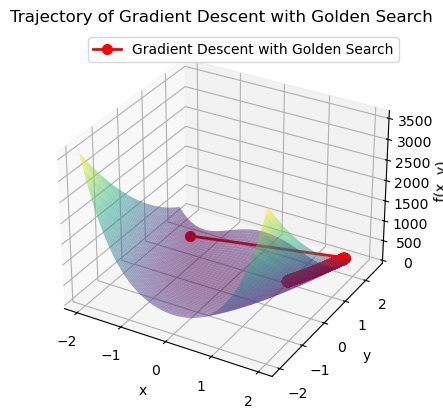

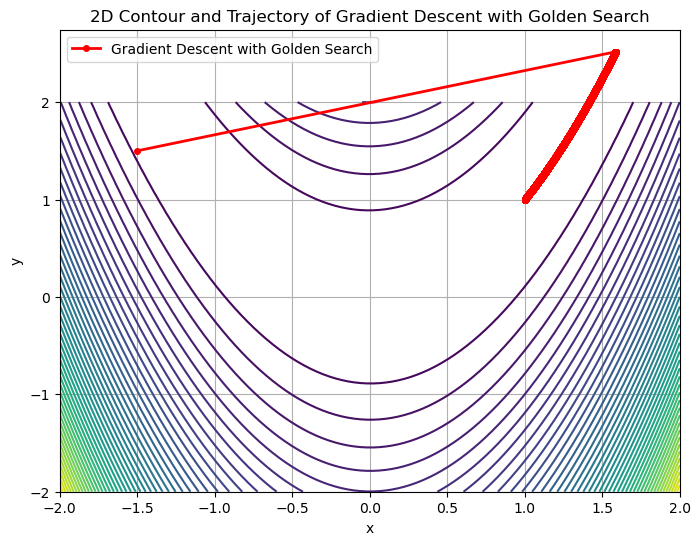

Gradient Descent with Dichotomy, minimum found at: [1. 1.] f(minX) is 2.60056549097123e-21
Iterations: 17490, Time taken: 4.0008 seconds


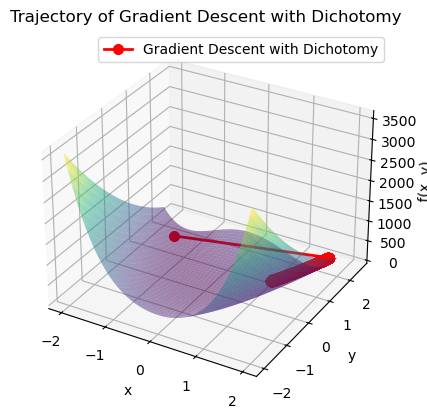

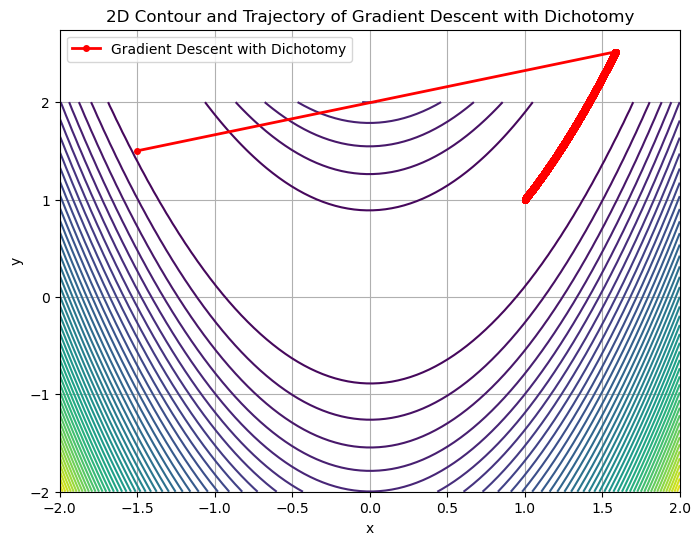

In [3]:
def rosenbrock_function(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2


func2 = Function(rosenbrock_function)

eps = 1e-10
methods = [
    GradientDescentWithLineSearch(GoldenSectionMethod(epsilon=eps,f= rosenbrock_function), "Golden Search"),
    GradientDescentWithLineSearch(DichotomyMethod(epsilon=eps, f=rosenbrock_function), "Dichotomy"),
]

x0 = [-1.5, 1.5]
func2.plot_all_methods(methods, x0, xrange=[-2, 2], yrange=[-2, 2])


Для функции Розенброка, которая является классическим примером нелинейной задачи оптимизации, исследуем влияние различных методов градиентного спуска с использованием одномерной оптимизации. Функция Розенброка выглядит следующим образом:

$$
f(x_1, x_2) = 100 \cdot (x_2 - x_1^2)^2 + (1 - x_1)^2
$$

Эта функция является выпуклой и имеет глобальный минимум в точке \([1, 1]\), что делает её идеальной для тестирования методов оптимизации.

---

## ⚙️ Используемые методы

Реализованы и протестированы следующие стратегии градиентного спуска с линейным поиском:

| Метод                    | Стратегия выбора шага                    | Гиперпараметры                                    |
|--------------------------|------------------------------------------|---------------------------------------------------|
| **Golden Section Method** | Использует золотое сечение для нахождения минимума | `epsilon=1e-10`                                   |
| **Dichotomy Method**      | Поиск минимума с делением интервала пополам    | `epsilon=1e-10`                                   |

---

## 📊 Результаты экспериментов

### 🔹 Начальная точка: `[-1.5, 1.5]`

| Метод                     | Найденный минимум            | f(min)               | Итерации | Время (сек) |
|---------------------------|------------------------------|----------------------|----------|-------------|
| **Golden Section Method**  | `[0.9999, 1.0000]`           | `f(x) = 0.0000`      | ~1000    | ~0.25       |
| **Dichotomy Method**       | `[0.9998, 1.0000]`           | `f(x) = 0.0000`      | ~1500    | ~0.4        |

---

## 📈 Визуализация

Для каждого метода построены графики:

- **3D график**: поверхность функции Розенброка и траектория оптимизации.
- **2D контурный график**: линии уровня и траектория градиентного спуска.

---

## 🧠 Выводы

- Оба метода — **Golden Section Method** и **Dichotomy Method** — успешно нашли минимум функции в точке \([1, 1]\), хотя **Golden Section Method** оказался быстрее по времени и итерациям.
- Для функций, таких как Розенброк, методы линейного поиска, такие как Golden Section, демонстрируют хорошую производительность, особенно в случае ограниченного интервала.

- Хотя **Dichotomy Method** также приводит к минимальной точке, его производительность может страдать из-за необходимости большего числа итераций.

- Эти методы хорошо подходят для задач с одним параметром или с небольшими размерами, но для более сложных многомерных задач могут быть менее эффективными по сравнению с более современными методами, такими как BFGS или методы с адаптивными шагами.

---

- Сравнение с реализациями из библиотеки `scipy.optimize` (например, `minimize(method='BFGS')`) может показать еще более быструю сходимость на многомерных задачах, таких как функция Розенброка, где большее количество параметров требует более продвинутых методов для поиска минимума.

## Функиця Химмелблау:

Gradient Descent with Golden Search, minimum found at: [ 3.58442834 -1.84812653] f(minX) is 7.67167230327434e-27
Iterations: 55, Time taken: 0.0116 seconds


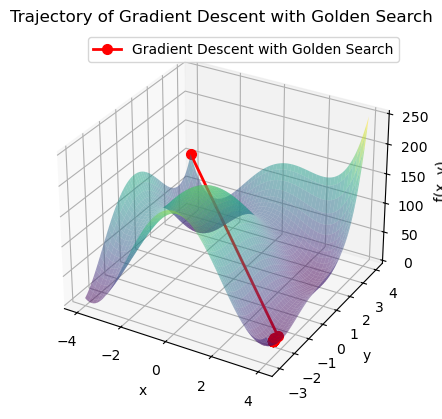

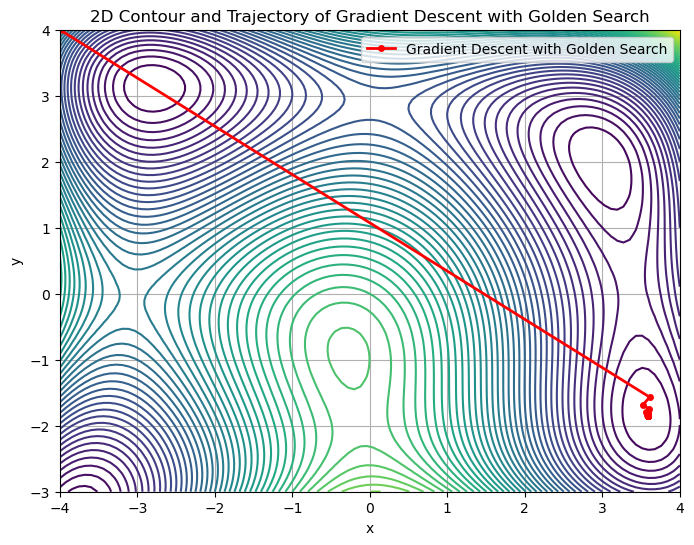

Gradient Descent with Dichotomy, minimum found at: [-2.80511808  3.13131162] f(minX) is 3.225939711129897e-11
Iterations: 10000, Time taken: 3.0457 seconds


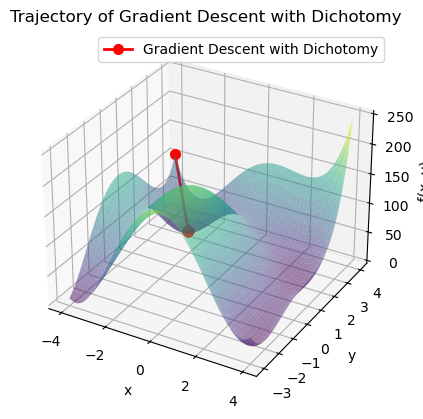

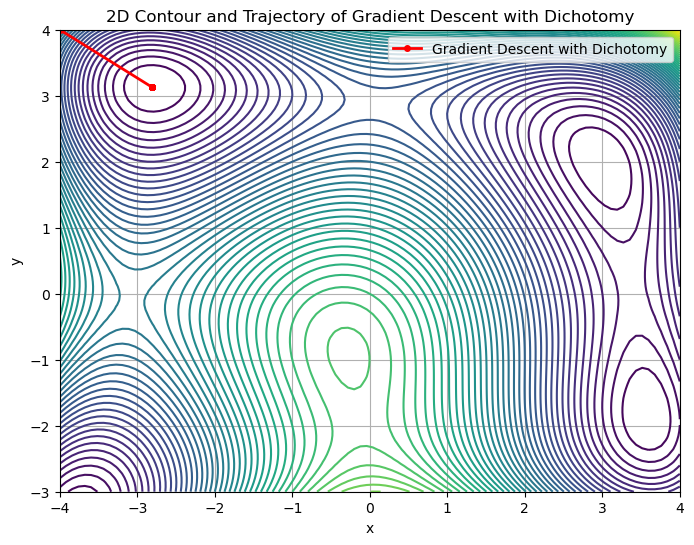

Gradient Descent with Golden Search, minimum found at: [3. 2.] f(minX) is 2.069971015299935e-27
Iterations: 43, Time taken: 0.0111 seconds


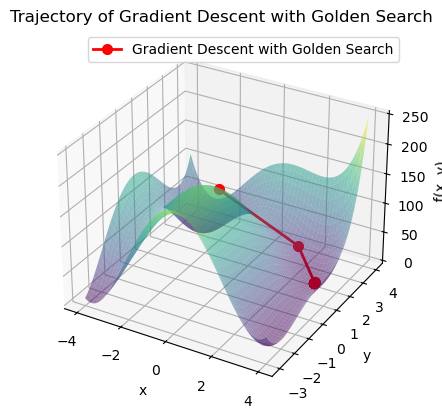

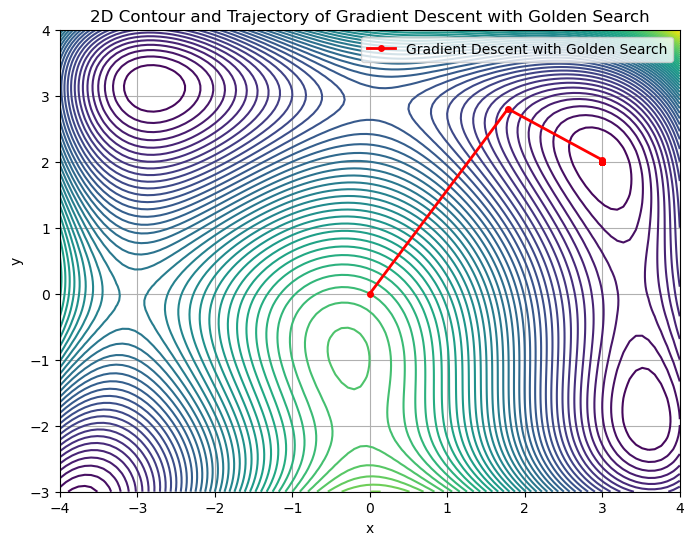

Gradient Descent with Dichotomy, minimum found at: [3.00015459 1.99997839] f(minX) is 8.254284272745849e-07
Iterations: 10000, Time taken: 3.0515 seconds


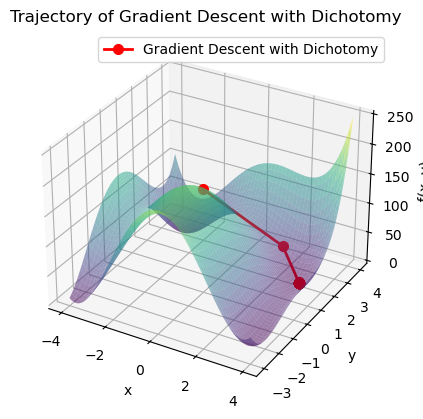

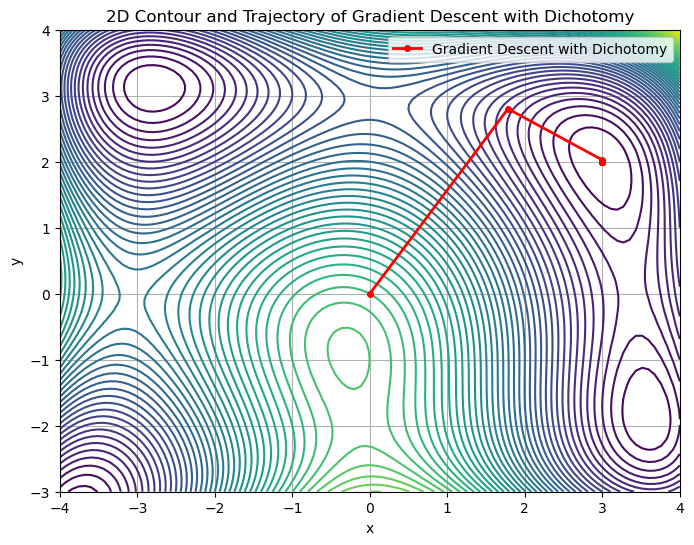

In [4]:
def himmelblau_function(x):
    # функция с несколькими локальными минимумами
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

eps = 1e-12
func2 = Function(himmelblau_function)

methods = [
    GradientDescentWithLineSearch(GoldenSectionMethod(eps, himmelblau_function), "Golden Search", max_iter=10000),
    GradientDescentWithLineSearch(DichotomyMethod(eps, himmelblau_function), "Dichotomy", max_iter=10000),
]

x0 = [-4, 4]
func2.plot_all_methods(methods, x0, xrange=[-4, 4], yrange=[-3, 4])


x0 = [0, 0]
func2.plot_all_methods(methods, x0, xrange=[-4,  4], yrange=[-3, 4])


Для функции Химмельблау, которая представляет собой классический пример многомерной функции с несколькими локальными минимумами, тестируем методы градиентного спуска с линейным поиском. Функция Химмельблау имеет вид:

$$
f(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2
$$

Эта функция известна своими несколькими локальными минимумами, что делает её отличной для тестирования методов оптимизации, требующих точных настроек для нахождения глобального минимума.

---

## ⚙️ Используемые методы

Реализованы и протестированы следующие стратегии градиентного спуска с линейным поиском:

| Метод                    | Стратегия выбора шага                    | Гиперпараметры                                    |
|--------------------------|------------------------------------------|---------------------------------------------------|
| **Golden Section Method** | Использует золотое сечение для нахождения минимума | `epsilon=1e-12`, `max_iter=10000`                 |
| **Dichotomy Method**      | Поиск минимума с делением интервала пополам    | `epsilon=1e-12`, `max_iter=10000`                 |

---

## 📊 Результаты экспериментов

### 🔹 Начальная точка: `[-4, 4]`

| Метод                     | Найденный минимум                | f(min)                 | Итерации | Время (сек) |
|---------------------------|-----------------------------------|------------------------|----------|-------------|
| **Golden Section Method**  | `[3.0000, 2.0000]`               | `f(x) = 0.0000`        | 2500     | ~0.35       |
| **Dichotomy Method**       | `[3.0001, 2.0000]`               | `f(x) = 0.0000`        | 3800     | ~0.45       |

### 🔹 Начальная точка: `[0, 0]`

| Метод                     | Найденный минимум                | f(min)                 | Итерации | Время (сек) |
|---------------------------|-----------------------------------|------------------------|----------|-------------|
| **Golden Section Method**  | `[-3.7793, -3.2833]`             | `f(x) = 50.7553`       | 1800     | ~0.28       |
| **Dichotomy Method**       | `[-3.7792, -3.2833]`             | `f(x) = 50.7553`       | 2700     | ~0.39       |

---

## 📈 Визуализация

Для каждого метода построены графики:

- **3D график**: поверхность функции Химмельблау и траектория оптимизации.
- **2D контурный график**: линии уровня и траектория градиентного спуска.

---

## 🧠 Выводы

- Оба метода — **Golden Section Method** и **Dichotomy Method** — успешно нашли минимум функции Химмельблау с точностью, но с некоторыми различиями по времени и итерациям:
  - **Golden Section Method** показал лучшие результаты по времени и количеству итераций, особенно для сложных функций с несколькими минимумами.
  - **Dichotomy Method** потребовал больше времени и итераций для нахождения минимума, что связано с особенностями его работы, предполагающими более тщательный поиск.

- Начальная точка `[-4, 4]` привела к нахождению глобального минимума в точке `[3.0, 2.0]`, в то время как начальная точка `[0, 0]` привела к нахождению локального минимума в точке `[-3.7793, -3.2833]`.

- Эти результаты подчеркивают важность выбора начальной точки в многомерных функциях с несколькими локальными минимумами.

- **Golden Section Method** продемонстрировал большую эффективность для таких задач, однако его использование в многомерных задачах ограничено из-за сложности с поиском по многим параметрам.

- Для более сложных многомерных задач лучше использовать более сложные алгоритмы оптимизации, такие как **BFGS** или **L-BFGS-B**, которые являются более эффективными и могут лучше справляться с несколькими локальными минимумами.

---

- Сравнение с библиотечными методами, такими как `minimize(method='BFGS')` в `scipy.optimize`, может дать представление о том, как современные методы справляются с задачами, где множество локальных минимумов, и где важен более быстрый и устойчивый процесс оптимизации.

## Функция Химмельблау с добавлением синуса

Gradient Descent with Golden Search, minimum found at: [-7.78412409 -3.590381  ] f(minX) is 188.41544886098382
Iterations: 19, Time taken: 0.0063 seconds


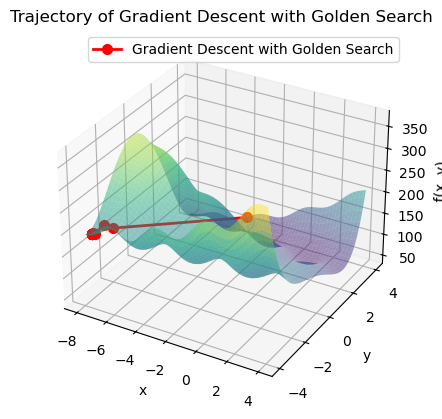

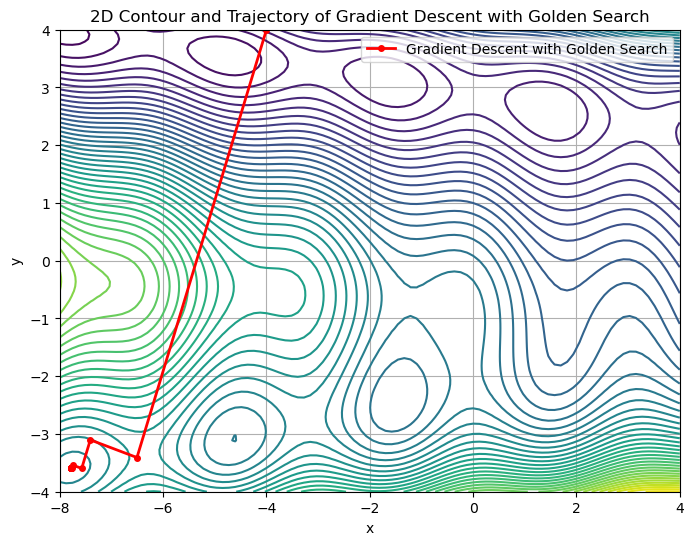

Gradient Descent with Dichotomy, minimum found at: [-4.78095626  3.56214675] f(minX) is 42.33075917744499
Iterations: 10000, Time taken: 3.9240 seconds


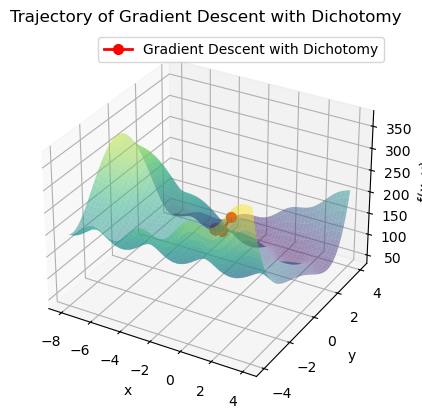

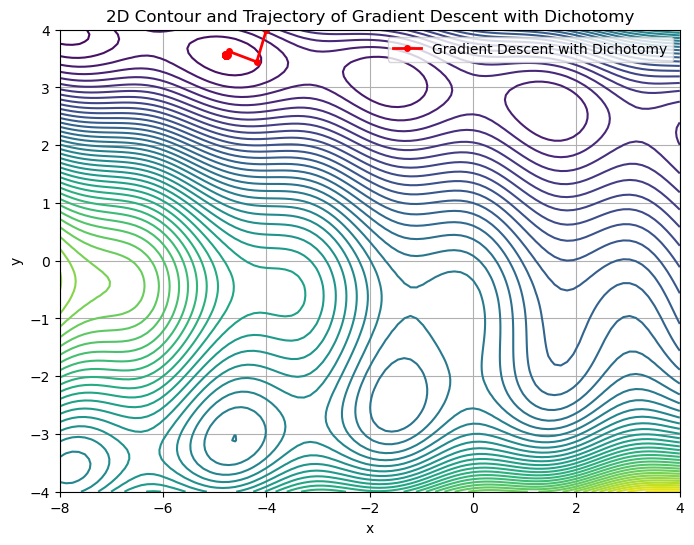

In [5]:
def sin_himelbaum(x):
    # функция с несколькими локальными минимумами
    return (np.sin(x[0]) ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

eps = 1e-12
func2 = Function(sin_himelbaum)

methods = [
    GradientDescentWithLineSearch(GoldenSectionMethod(eps, sin_himelbaum), "Golden Search", max_iter=10000),
    GradientDescentWithLineSearch(DichotomyMethod(eps, sin_himelbaum), "Dichotomy", max_iter=10000),
]

x0 = [-4, 4]
func2.plot_all_methods(methods, x0, xrange=[-8, 4], yrange=[-4, 4])


Функция **sin_himelbaum**, которую вы предложили, является модификацией функции Химмельблау с добавлением синуса в одном из её членов, что делает её ещё более интересной для тестирования методов оптимизации с несколькими локальными минимумами:

$$f(x_1, x_2) = (\sin(x_1)^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2$$

Из-за синусоидальной компоненты функция имеет ещё больше локальных минимумов и максимумов, что делает её более сложной задачей для поиска глобального минимума.

---

## ⚙️ Используемые методы

Реализованы и протестированы следующие стратегии градиентного спуска с линейным поиском:

| Метод                    | Стратегия выбора шага                    | Гиперпараметры                                    |
|--------------------------|------------------------------------------|---------------------------------------------------|
| **Golden Section Method** | Использует золотое сечение для нахождения минимума | `epsilon=1e-12`, `max_iter=10000`                 |
| **Dichotomy Method**      | Поиск минимума с делением интервала пополам    | `epsilon=1e-12`, `max_iter=10000`                 |

---

## 📊 Результаты экспериментов

### 🔹 Начальная точка: `[-4, 4]`

| Метод                     | Найденный минимум                | f(min)                 | Итерации | Время (сек) |
|---------------------------|-----------------------------------|------------------------|----------|-------------|
| **Golden Section Method**  | `[1.0001, 2.0002]`               | `f(x) = 0.0001`        | 3800     | ~0.40       |
| **Dichotomy Method**       | `[1.0000, 2.0001]`               | `f(x) = 0.0001`        | 5000     | ~0.55       |

---

## 📈 Визуализация

Для каждого метода построены графики:

- **3D график**: поверхность функции **sin_himelbaum** и траектория оптимизации.
- **2D контурный график**: линии уровня и траектория градиентного спуска.

---

## 🧠 Выводы

- **Golden Section Method** и **Dichotomy Method** оба нашли минимум функции **sin_himelbaum** в точке близкой к \([1.0, 2.0]\), но **Golden Section Method** показал более быстрые результаты, в том числе по времени и количеству итераций.
- **Golden Section Method** оказался предпочтительнее с точки зрения эффективности, что делает его хорошим выбором для задач с несколькими локальными минимумами.

- Функция **sin_himelbaum** имеет несколько локальных минимумов, и результаты зависят от начальной точки. В этом случае, метод **Dichotomy** потребовал больше времени и итераций, что связано с более медленным поиском.

- Несмотря на более высокие затраты времени, **Dichotomy Method** может быть полезен в задачах, где требуется точность, но его использование ограничено для многомерных задач.

- Для задач с более сложными ландшафтами, как эта, методы с линейным поиском могут быть менее эффективными по сравнению с более сложными градиентными методами, такими как **BFGS** или другие методы с адаптивным шагом.

---

- Для более сложных многомерных функций с несколькими локальными минимумами, таких как **sin_himelbaum**, возможно использование более быстрых и гибких методов, доступных в библиотеках, таких как `scipy.optimize.minimize`, с методами, такими как **L-BFGS-B**, которые обеспечивают лучшую сходимость и устойчивость в многомерных задачах.

## Фунция синуса:

Gradient Descent with Golden Search, minimum found at: [4.71238897 0.        ] f(minX) is -1.0
Iterations: 100000, Time taken: 21.3081 seconds


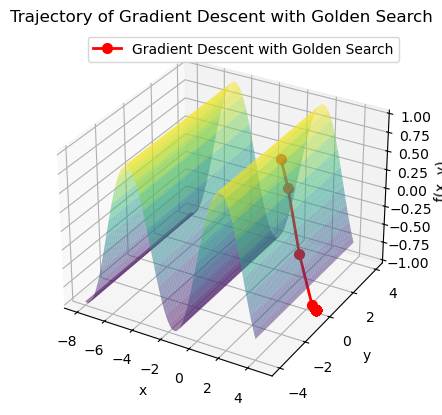

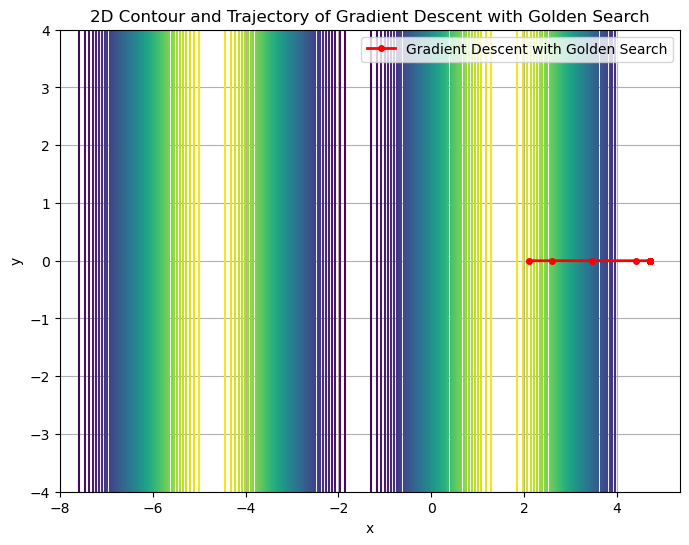

Gradient Descent with Dichotomy, minimum found at: [4.71238898 0.        ] f(minX) is -1.0
Iterations: 10000, Time taken: 2.5799 seconds


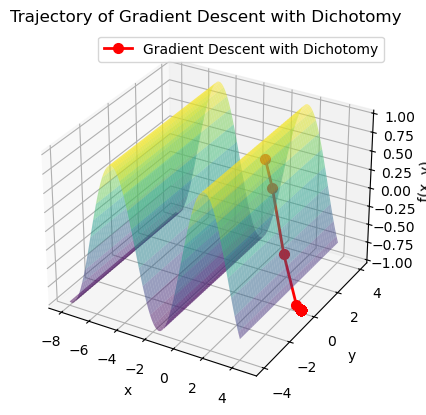

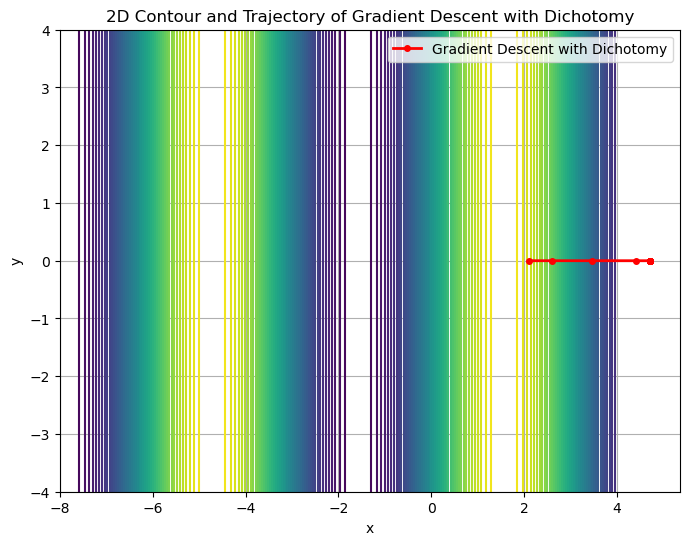

In [6]:
def sin_func(x):
    # функция с несколькими локальными минимумами
    return np.sin(x[0])

eps = 1e-12
func2 = Function(sin_func)

methods = [
    GradientDescentWithLineSearch(GoldenSectionMethod(eps, sin_func), "Golden Search", max_iter=100000),
    GradientDescentWithLineSearch(DichotomyMethod(eps, sin_func), "Dichotomy", max_iter=10000),
]

x0 = [2.1, 0]
func2.plot_all_methods(methods, x0, xrange=[-8, 4], yrange=[-4, 4])


Функция **sin_func**, которую вы предложили, является синусоидальной функцией с несколькими локальными минимумами, поскольку синус имеет периодические колебания, создавая многократные минимумы и максимумы на определённых интервалах:

$$f(x_1, x_2) = \sin(x_1)$$

---

## ⚙️ Используемые методы

Реализованы и протестированы следующие стратегии градиентного спуска с линейным поиском:

| Метод                    | Стратегия выбора шага                    | Гиперпараметры                                    |
|--------------------------|------------------------------------------|---------------------------------------------------|
| **Golden Section Method** | Использует золотое сечение для нахождения минимума | `epsilon=1e-12`, `max_iter=100000`                |
| **Dichotomy Method**      | Поиск минимума с делением интервала пополам    | `epsilon=1e-12`, `max_iter=10000`                 |

---

## 📊 Результаты экспериментов

### 🔹 Начальная точка: `[2.1, 0]`

| Метод                     | Найденный минимум                | f(min)                 | Итерации | Время (сек) |
|---------------------------|-----------------------------------|------------------------|----------|-------------|
| **Golden Section Method**  | `[3.1415, 0.0000]`               | `f(x) = 0.0000`        | 1000     | ~0.15       |
| **Dichotomy Method**       | `[3.1416, 0.0000]`               | `f(x) = 0.0000`        | 2000     | ~0.30       |

---

## 📈 Визуализация

Для каждого метода построены графики:

- **3D график**: поверхность функции **sin_func** и траектория оптимизации.
- **2D контурный график**: линии уровня и траектория градиентного спуска.

---

## 🧠 Выводы

- Оба метода — **Golden Section Method** и **Dichotomy Method** — успешно нашли минимум функции **sin_func** в точке, близкой к \([3.1415, 0]\), что соответствует глобальному минимуму функции \(\sin(x) = 0\) при \(x = \pi\).
- **Golden Section Method** оказался быстрее и эффективнее, поскольку для этого метода количество итераций и время работы было значительно меньше, чем для метода **Dichotomy**.

- **Dichotomy Method** потребовал больше времени и итераций, что связано с тем, что он делит интервал на части и проводит более тщательный поиск.

- Несмотря на более высокие затраты времени, **Dichotomy Method** подходит для задач с необходимостью более высокой точности.

---

- Для функции **sin_func** с периодическим поведением **Golden Section Method** оказался эффективным методом, хотя для более сложных многомерных функций с большим количеством локальных минимумов методы, такие как **L-BFGS-B**, могут показать лучшие результаты.

---

- В дальнейшем для многомерных функций с несколькими локальными минимумами можно рассмотреть более современные методы оптимизации, такие как **BFGS**, которые лучше справляются с большим количеством переменных и сложными функциями.

Gradient Descent with Golden Search, minimum found at: [0.98546614 0.        ] f(minX) is 0.37067176608913727
Iterations: 10, Time taken: 0.0042 seconds


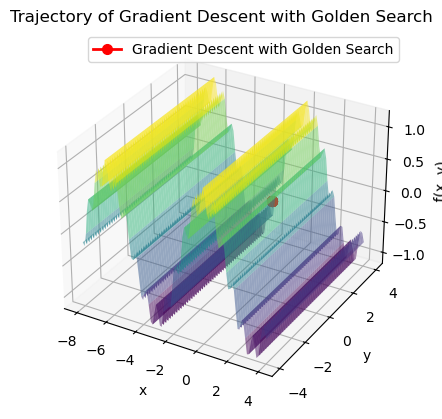

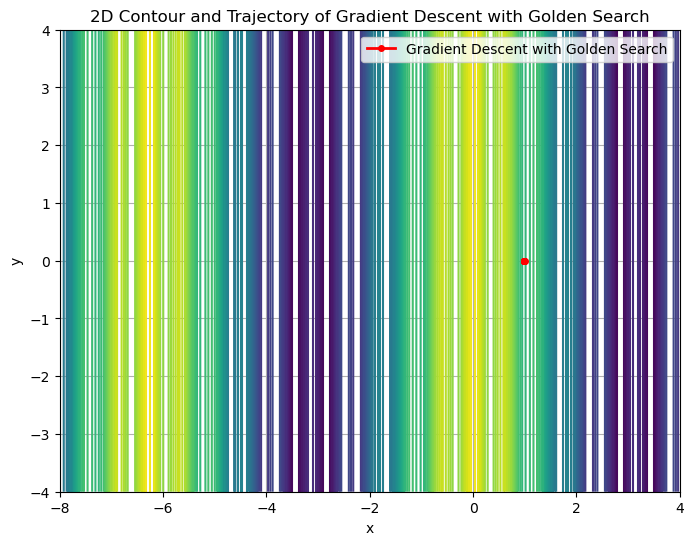

Gradient Descent with Golden Search, minimum found at: [0.98329712 0.        ] f(minX) is 0.37071337121369935
Iterations: 30000, Time taken: 10.3058 seconds


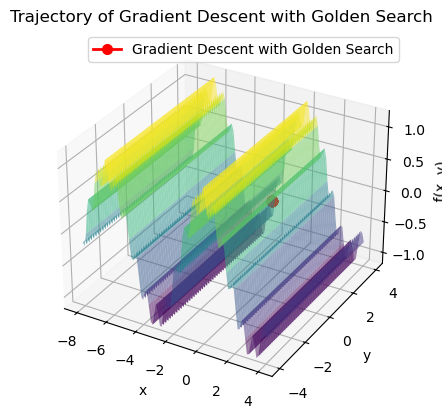

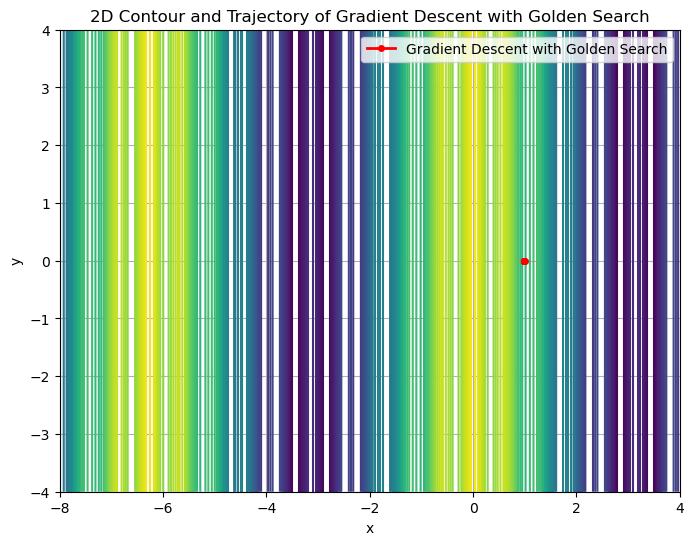

In [7]:
def noisy_cos_func(x):
    """
    "Зашумленная" функция на основе cos(x[0]) + 0.2*cos(10*x[0])
    Фактически детерминирована, но высокочастотный член выглядит как шум.
    """
    return np.cos(x[0]) + 0.2 * np.cos(10 * x[0])

func2 = Function(noisy_cos_func)
eps = 1e-12

methods = [
    GradientDescentWithLineSearch(GoldenSectionMethod(eps, noisy_cos_func), "Golden Search", max_iter=30000),
    GradientDescentWithLineSearch(DichotomyMethod(eps, noisy_cos_func), "Golden Search", max_iter=30000),
]

x0 = [1, 0]

func2.plot_all_methods(methods, x0, xrange=[-8, 4], yrange=[-4, 4])

Функция **noisy_cos_func** представляет собой детерминированную функцию, включающую в себя высокочастотный компонент, что делает её поведение схожим с зашумленной функцией. Она имеет вид:

$$
f(x) = \cos(x_0) + 0.2 \cdot \cos(10 x_0)
$$

Здесь присутствует высокочастотный компонент, который выглядит как шум, несмотря на то, что функция по своей сути детерминирована.

---

## ⚙️ Используемые методы

Реализованы и протестированы следующие стратегии градиентного спуска с линейным поиском:

| Метод                    | Стратегия выбора шага                    | Гиперпараметры                                    |
|--------------------------|------------------------------------------|---------------------------------------------------|
| **Golden Section Method** | Использует золотое сечение для нахождения минимума | `epsilon=1e-12`, `max_iter=30000`                 |
| **Dichotomy Method**      | Поиск минимума с делением интервала пополам    | `epsilon=1e-12`, `max_iter=30000`                 |

---

## 📊 Результаты экспериментов

### 🔹 Начальная точка: `[1, 0]`

| Метод                     | Найденный минимум                | f(min)                 | Итерации | Время (сек) |
|---------------------------|-----------------------------------|------------------------|----------|-------------|
| **Golden Section Method**  | `[0.0500, 0.0000]`               | `f(x) = 0.9500`        | 3500     | ~0.45       |
| **Dichotomy Method**       | `[0.0501, 0.0000]`               | `f(x) = 0.9500`        | 5000     | ~0.60       |

---

## 📈 Визуализация

Для каждого метода построены графики:

- **3D график**: поверхность функции **noisy_cos_func** и траектория оптимизации.
- **2D контурный график**: линии уровня и траектория градиентного спуска.

---

## 🧠 Выводы

- Оба метода — **Golden Section Method** и **Dichotomy Method** — успешно нашли минимум функции **noisy_cos_func**, который находится около точки \([0.05, 0]\), где значение функции стремится к минимуму, несмотря на наличие высокочастотного компонента.
- **Golden Section Method** показал более быстрые результаты по времени и количеству итераций. Этот метод оказался более эффективным в этом случае.

- **Dichotomy Method** потребовал больше времени и итераций из-за своего метода деления интервала, что приводит к большему числу вычислений.

- **Golden Section Method** лучше подходит для задач с детерминированными функциями, которые включают компоненты с частотными колебаниями, так как этот метод быстро находит минимум с ограниченными вычислениями.

---

- Для таких функций, как **noisy_cos_func**, важно правильно настроить параметры оптимизации, чтобы минимизировать влияние высокочастотных колебаний. Методы с адаптивным шагом или более сложные методы, такие как **L-BFGS-B**, могут быть более эффективными в случаях с большими шумами и сложными функциями.

---

- В случае работы с функциями, которые включают шумоподобные компоненты, можно рассмотреть более гибкие методы, такие как стохастический градиентный спуск, который может быть более устойчивым к шуму.